# Actividad: Calidad.

## Importaciones.

En caso de no tener las siguientes librerias descargadas ejecutar el siguiente comando:

In [4]:
!pip install numpy scipy matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\mgonzgarc\Anaconda3\python.exe -m pip install --upgrade pip


In [5]:
import csv
import numpy as np
from statistics import mode
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import math

## Lectura de datos.

En la carpeta `data` se encuentra el csv de los datos separados por espacios del producto. En este caso, se tratan de las medidas de los grosores de unos discos. Para acceder a ellos, extraeremos esos datos y los almacenaremos en una variable mediante una lista.

In [6]:
numeros = []
with open('data/data.csv', newline='') as archivo_csv:
    lector_csv = csv.reader(archivo_csv, delimiter=' ')
    for fila in lector_csv:
        for elemento in fila:
            numeros.append(float(elemento))

In [7]:
print(numeros) # Comprobación de datos.

[1.15, 1.2, 1.17, 1.16, 1.16, 1.15, 1.17, 1.2, 1.16, 1.19, 1.17, 1.13, 1.15, 1.2, 1.18, 1.17, 1.16, 1.2, 1.17, 1.17, 1.2, 1.14, 1.19, 1.13, 1.19, 1.16, 1.18, 1.16, 1.17, 1.15, 1.21, 1.15, 1.2, 1.18, 1.17, 1.17, 1.13, 1.16, 1.16, 1.17, 1.2, 1.18, 1.15, 1.13, 1.2, 1.17, 1.19, 1.23, 1.2, 1.24, 1.17, 1.17, 1.17, 1.17, 1.18, 1.24, 1.16, 1.18, 1.16, 1.22, 1.23, 1.22, 1.19, 1.13, 1.15, 1.15, 1.22, 1.19, 1.18, 1.19, 1.17, 1.16, 1.17, 1.18, 1.19, 1.23, 1.19, 1.16, 1.19, 1.2, 1.17, 1.13, 1.22, 1.19, 1.21, 1.2, 1.19, 1.17, 1.19, 1.22, 1.19, 1.18, 1.11, 1.19, 1.19, 1.17, 1.19, 1.17, 1.2, 1.16, 1.19, 1.2, 1.2, 1.17, 1.25, 1.16, 1.16, 1.2, 1.2, 1.16, 1.18, 1.21, 1.2, 1.22, 1.19, 1.14, 1.19, 1.17, 1.2, 1.16, 1.15, 1.2, 1.12, 1.11, 1.18]


## Cálculo de las medidas.

### 1. Medidas de tendencia central.

#### 1.1. Cálculo de la media muestral.
Como se dice en el enunciado, tomamos como media muestral la media poblacional.

In [8]:
media = np.mean(numeros)
print("La media de los datos es:", round(media, 4))

La media de los datos es: 1.1786


#### 1.2. Cálculo de la mediana junto a los cuartiles.
La mediana equivale al cuartil 2.

In [9]:
q1 = np.percentile(numeros, 25) # Primer cuartil
mediana = np.median(numeros) # Segundo cuartil = mediana
q3 = np.percentile(numeros, 75) # Tercer cuartil

print("Primer cuartil (Q1):", round(q1,4))
print("Mediana (Q2):", round(mediana,4))
print("Tercer cuartil (Q3):", round(q3,4))

Primer cuartil (Q1): 1.16
Mediana (Q2): 1.18
Tercer cuartil (Q3): 1.2


#### 1.3. Cálculo modal.

In [10]:
moda = mode(numeros)
print("La moda de los datos es:", moda)

La moda de los datos es: 1.17


### 2. Medidas de dispersión.

#### 2.1. Cálculo de la desviación estándar muestral.
Al ser una muestra superior de 30, decimos que la desviación estándar muestral es similar a la cuasidesviación.

In [11]:
desv_estandar_m = np.std(numeros, ddof=1)

print("La desviación estándar muestral es:", round(desv_estandar_m, 4))

La desviación estándar muestral es: 0.027


#### 2.2. Coeficiente de variación.
El coeficiente de variación se trata de la división en porcentaje de la desviación estándar poblacional entre la media.

In [12]:
desv_estandar_p = np.std(numeros) # Desviación estándar poblacional

coeficiente_variacion = (desv_estandar_p / media) * 100
print("El coeficiente de variación es:", round(coeficiente_variacion, 4))

El coeficiente de variación es: 2.2775


### 3. Medidas de forma.

#### 3.1. Sesgo.
Se trata de un indicador de la asimetría de la distribución. Si se obtiene un sesgo negativo se trata de una distribución asimétrica negativa, es decir que hay más concentración de datos al final de la distribución. En caso de ser positiva es asimétrica positiva, habiendo más concentración de datos al principio. En cambio, si resulta cero, es totalmente simétrica.

In [13]:
sesgo_estandarizado = skew(numeros)
print("Sesgo estandarizado:", sesgo_estandarizado)

Sesgo estandarizado: -0.011252266273367712


#### 3.2. Curtosis.
Describe el grado de concentración de los datos alrededor de la media. En caso de ser positiva tendríamos una distribución leptocúrtica, es decir, mas espigada/apuntada alrededor del valor central. En caso de ser negativa, sería mas aplanada, llamandola distribución platicúrtica. Si esta es cero, se trata de una distribución mesocúrtica, similar a una normal.

In [14]:
curtosis_estandarizada = kurtosis(numeros)
print("Curtosis estandarizada:", curtosis_estandarizada)

Curtosis estandarizada: 0.11871812742281751


### 4. Gráficos estadísticos.
Todos los gráficos generados, se guardarán en la carpeta `graphs`.

#### 4.1. Histograma de frecuencias utilizando la regla de Strugles.

Primero mediante la regla de Strugles determinamos el número apropiado de clases/intervalos (k) que debemos de construir en el histograma. La formula es:

$$ k = 1 + \log_2(n) $$

In [15]:
n = len(numeros) # Tamaño de la muestra.
k = 1 + math.log2(n)
k = round(k) # Aproximación al entero más cercano.
print(f"Número de clases (k) según la regla de Sturges: {k}")

Número de clases (k) según la regla de Sturges: 8


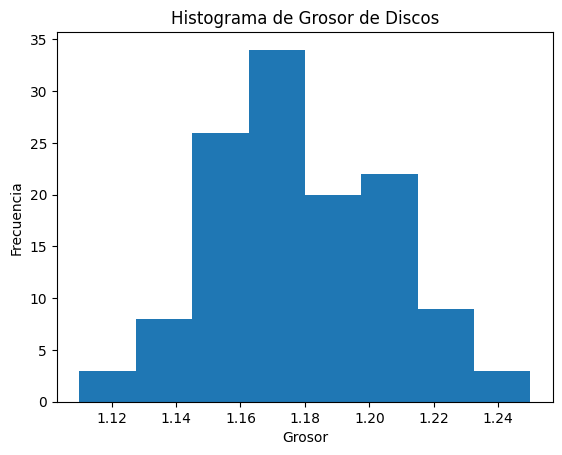

In [16]:
plt.hist(numeros, bins=k)

plt.title("Histograma de Grosor de Discos")
plt.xlabel("Grosor")
plt.ylabel("Frecuencia")

plt.savefig('graphs/histograma.png')
plt.show()

#### 4.2. Diagrama de cajas.

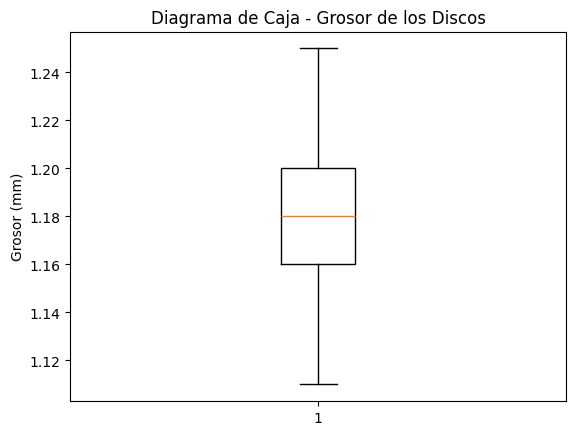

In [17]:
plt.boxplot(numeros)

plt.title("Diagrama de Caja - Grosor de los Discos")
plt.ylabel("Grosor (mm)")

plt.savefig('graphs/diagrama-de-caja.png')
plt.show()

### 5. Índices de capacidad del proceso.

Evalúan la capacidad de un proceso para cumplir con los límites de especificación, considerando la variabilidad del proceso.

In [18]:
# Especificaciones del problema.
ES = 1.30
EI = 1.10
# Valor nominal.
N = 1.20

#### 5.1. Índice de capacidad potencial del proceso. $C_{p}$.
Lo deseable es que los procesos tengan un índice $C_{p}$ superior a 1 indicando que es capaz de cumplir con las especificaciones y es más robusto. <br>
Para la resolución de este tomamos como desviación estándar del proceso, la desviación estandar muestral, ya que estamos evaluando la capacidad del proceso basándonos en una muestra de datos y queremos entender cómo esa muestra se desvía de los límites de especificación.

In [19]:
cp = (ES - EI) / (6*desv_estandar_m)
print("El Cp es:", round(cp, 4))

El Cp es: 1.2368


#### 5.2. Índice de capacidad para la especificación inferior. $C_{pi}$.

In [20]:
cpi = (media - EI) / (3*desv_estandar_m)
print("El Cpi es:", round(cpi, 4))

El Cpi es: 0.9726


#### 5.3. Índice de de capacidad para la especificación superior. $C_{ps}$.

In [21]:
cps = (ES - media) / (3*desv_estandar_m)
print("El Cps es:", round(cps, 4))

El Cps es: 1.501


Evaluación de resultados $C_{ps}$ y $C_{pi}$:
- Si ambos son altos, es decir, cercanos a 1 o superiores. Indican que el proceso tiene capacidad para mantenerse dentro de los límites correspondientes.
- Si son bajos, es decir, menores a 1. Indican que el proceso puede tener dificultades para mantenerse dentro de los límites correspondientes.

#### 5.4. Índice de capacidad real del proceso. $C_{pk}$.
Lo óptimo es que sea superior a 1, indicando así que el proceso produce piezas que cumplen con las especificaciones, con un margen adicional para la variabilidad. En caso de ser justamente 1, significa que puede producir piezas que llegan justo a los límites de especificación. Y si es menor, significa que el proceso tiene dificultades para cumplir con las especificaciones; hay una considerable cantidad de piezas que no cumplen con los límites.

In [22]:
cpk = min(cpi, cps)
print("El Cpk es:", round(cpk, 4))

El Cpk es: 0.9726


#### 5.5. Índice de centrado del proceso. *K*.

In [23]:
k = (media - N) / (3*desv_estandar_m)
print("El valor de k es:", round(k, 4))

El valor de k es: -0.2642
